# TASK 4 (Email Spam Detection With Machine Learning)
To build an email spam detector using machine learning, you'll need to follow a series of steps to
preprocess the data, train a model, and evaluate its performance. 

In [132]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\markn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
# Reading the data
df = pd.read_csv('DataSet/spam.csv',encoding = "ISO-8859-1")

In [134]:
# Preview data
df.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### As you can see we have unnamed columns with NaN so we will drop all unnamed columns

In [136]:
# Droping Unnamed columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


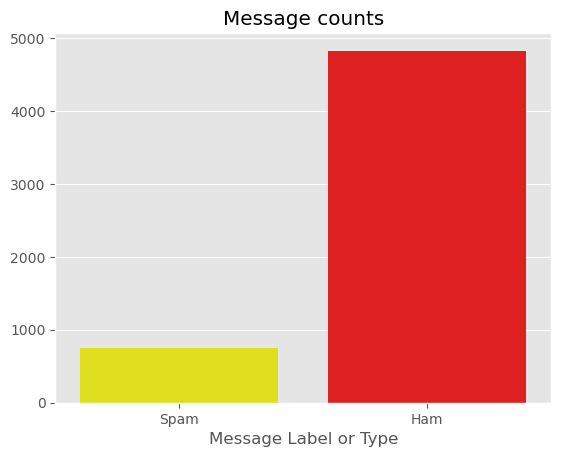

In [137]:
# Visualizing ham and spam messages using bar plot
message_counts = [df[df['label']=='spam'].shape[0], df[df['label']=='ham'].shape[0]]
labels = ['Spam','Ham']
plt.title('Message counts')
plt.xlabel('Message Label or Type')
sns.barplot(x=labels,y=message_counts,palette=['yellow','red'])
plt.show()

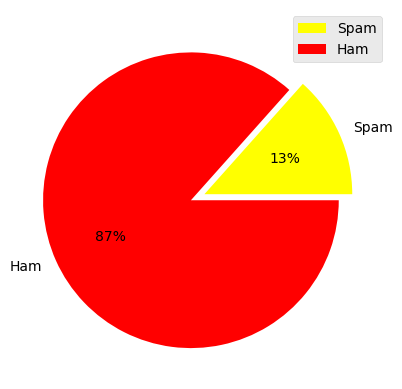

In [138]:
# Visualizing ham and spam messages using pie chart
message_counts = [df[df['label']=='spam'].shape[0], df[df['label']=='ham'].shape[0]]
labels = ['Spam','Ham']
plt.pie(x=message_counts,explode=[0,0.1],labels=labels,autopct='%0.f%%',colors=['yellow','red'])
plt.legend()
plt.show()

In [139]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Messages'},inplace=True)
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [140]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- ham => 0
- spam => 1

In [142]:
# Checking for missing values in dataset
df.isnull().sum()

label    0
email    0
dtype: int64

In [143]:
# Checking for duplicates value in dataset
df.duplicated().sum()

403

In [144]:
# dropping all duplicated values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [145]:
# Adding columns for number of character
df['Num_characters'] = df['email'].apply(len)
# Preview data
df.head()

,label,email,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [146]:
# Adding columns for number of words in dataset
df['Num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))
# Preview data
df.head()

,label,email,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [147]:
# Adding columns for number of sentences in datase
df['Num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
# Preview data
df.head()

,label,email,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Preprocessing the Data
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [149]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [150]:
# Transforming text and adding it in new column
df['Transformed_text'] = df['email'].apply(transform_text)
# Preview data
df.head()

,label,email,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [151]:
# Visualizing which word appeared more in ham and spam
# !pip install WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

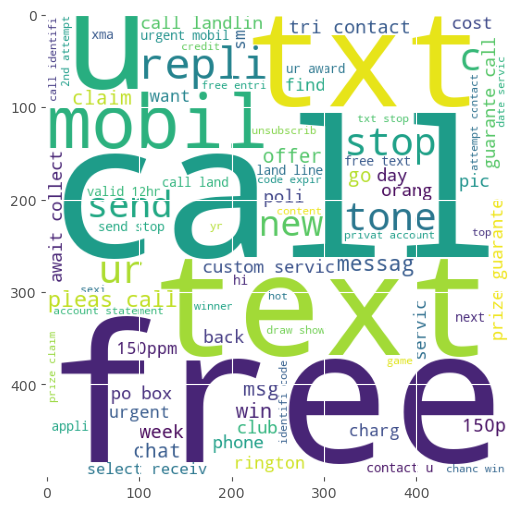

In [152]:
# for spam messege
spam_wc = wc.generate(df[df['label'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

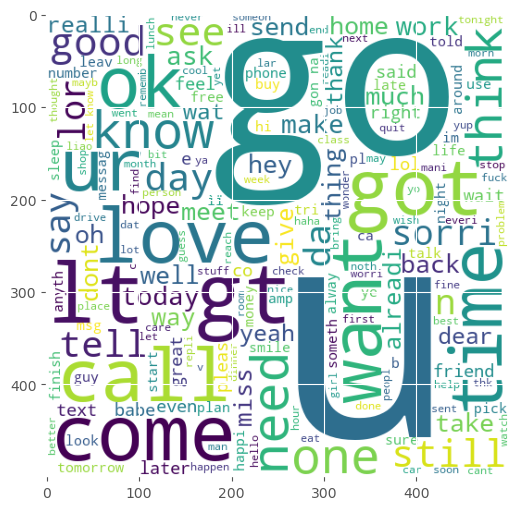

In [153]:
# for ham message
ham_wc = wc.generate(df[df['label'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [154]:
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [155]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [156]:
X.shape

(5169, 3000)

In [157]:
y = df['label'].values

In [158]:
y.shape

(5169,)

In [159]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [160]:
# Model trainin
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

In [161]:
svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid', probability=True)

In [162]:
y_pred = svc.predict(X_test)

In [163]:
# Model Evaluations
from sklearn.metrics import accuracy_score, precision_score
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9747899159663865


In [165]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9758220502901354
Confusion Matrix:
[[893   3]
 [ 22 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.84      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034



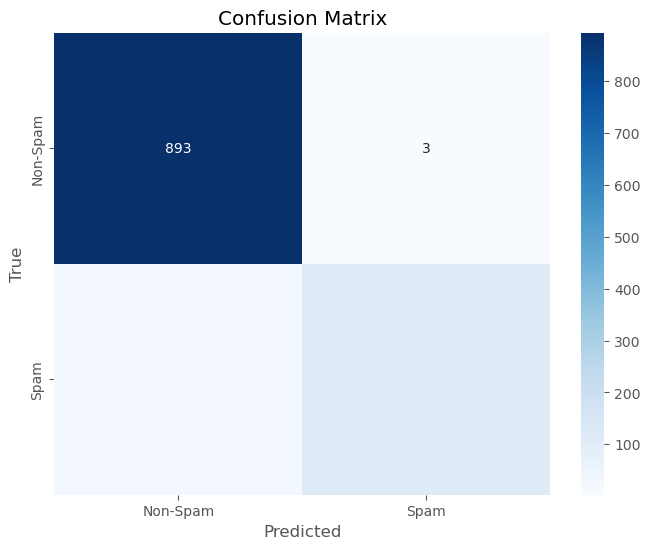

In [167]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Non-Spam', 'Spam'],
yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Notes:
- **Dataset Path**: Replace `'DataSet/spam.csv'` with the actual path to your dataset.
- **Feature and Label Columns**: Adjust `data['email']` and `data['label']` according to the actual
column names in your dataset.
- **Model Choice**: This example uses MulƟnomial Naive Bayes, which is commonly used for text
classificaƟon. You can experiment with other models like LogisƟc Regression or Support Vector
Machines (SVM) by imporƟng them from `sklearn`